# Agglomerative Hieraichical Clustering
**階層集群分類法可分為**
1. 凝聚分層集群(Agglomerative):以每一個樣本唯一集群，將相近的集群合併，直到只存在一個集群  
2. 分離分層集群(Divisive):一開始只設一個集群，然後逐步分割，直到每個集群只含一個樣本

本範例使用一組隨機資料，取得每一點之間距離後，使用Agglomerative hierarchy之3種方法分群後，再繪製階層圖

### 步驟一、製作一組隨機資料

In [23]:
# 製作一組隨機資料
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10  # 返回一個隨機矩陣
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 步驟二、取得每一點之間距離

In [24]:
from scipy.spatial.distance import pdist, squareform  #計算空間距離函數

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


### 步驟三、使用Agglomerative hierarchy進行分層
**凝聚分層集群合併方式有:**
1. 單一鏈結(Single Linkage):取兩集群中最"近"的兩個點
2. 完整鏈結(Complete Linkage): 取兩集群中最"遠"的兩個點
3. 平均鏈結(Average link distance):所有點的平均距離，較不受離群值的影響
使用hierarchy之linkage套件，其參數method分別為single、complete、average

**scipy.cluster.hierarchy import linkage套件之重要參數有**
1. method -> single、complete、average  
2. metric，距離運算公式->euclidean(歐式)  
3. ward，設定變異數大小以下，進行合併

##### 方法一:

In [25]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['Cluster', 'Cluster',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

<ipython-input-25-9e2cfdd65e42>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  row_clusters = linkage(row_dist, method='complete', metric='euclidean')


,Cluster,Cluster,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


##### 方法二:

In [26]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['Cluster', 'Cluster',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,Cluster,Cluster,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


##### 方法三:

In [28]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['Cluster', 'Cluster',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,Cluster,Cluster,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


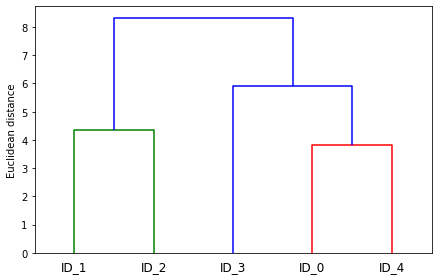

In [27]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

圖片階層示意
<img src="https://github.com/Yi-Huei/bin/blob/master/images/hierarchy_img.png?raw=true" width="500px" />